In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

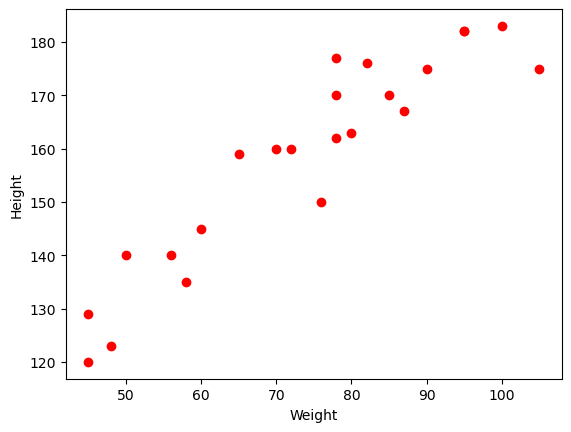

In [3]:
## Scatter plot

plt.scatter(df['Weight'], df['Height'], color = "red")
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
## correlation 

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


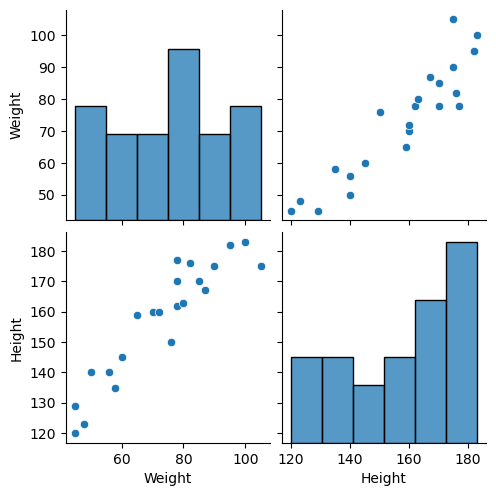

In [5]:
## seaborn for visualization

import seaborn as sns

sns.pairplot(df)

In [6]:
# Independent and dependent features

X = df[["Weight"]]   # Independent feature should be in dataframe or 2D
Y = df["Height"]  # Dependent variable should be in series or 1D

In [7]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [8]:
np.array(X).shape  ## 2D

(23, 1)

In [9]:
X_series = df['Weight']
np.array(X_series).shape   ## 1D

(23,)

In [10]:
np.array(Y).shape    # 1D

(23,)

In [11]:
## Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [12]:
# Standardization

from sklearn.preprocessing import StandardScaler

In [13]:
type(X_train)

pandas.core.frame.DataFrame

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # fit_transform() diff mean and std

In [15]:
X_test = scaler.transform(X_test)  # Be caution : No data leakage

In [16]:
# Apply Linear Regression

from sklearn.linear_model import LinearRegression

In [17]:
regression = LinearRegression(n_jobs = -1)

In [18]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [19]:
print(f"Coefficient or Slope : {regression.coef_}")
print(f"Intercept : {regression.intercept_}")

Coefficient or Slope : [17.2982057]
Intercept : 156.47058823529412


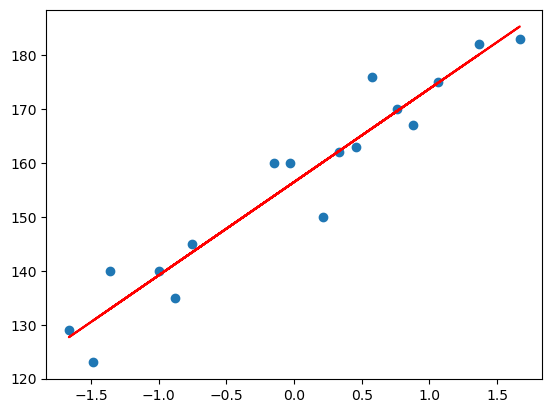

In [20]:
# Plot training data and plot best fit line

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = "red")

In [21]:
# Prediction for test data

y_pred = regression.predict(X_test)

### Prediction of test data

1) Predicted_height_output = Intercept + coef_(weights)
2) y_pred_test = 80.52 + 1.047 * (X_test)

In [22]:
## Performance metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"mse : {mse}")
print(f"mae : {mae}")
print(f"rmse : {rmse}")

mse : 114.84069295228699
mae : 9.665125886795005
rmse : 10.716374991212605


##  R square

formula :
# R ^ 2 = 1 - SSR/SST

Where :

    R ^ 2 = coefficient of determination
    SSR = sum of squares of residuals
    SST = total sum of squares
    

In [24]:
from sklearn.metrics import r2_score

In [25]:
score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


# Adjusted R ^ 2 = 1 - [(1 - R^2) * (n-1)/(n-k-1)]

where :
        
        R^2 = The R ^ 2 of the model
        n = no.of observations
        k = no.of predictor variables

In [26]:
# display adjusted r ^ 2
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.6701033397476595

In [27]:
#!pip install statsmodels

In [28]:
## OLS Linear Regression
import statsmodels.api as sm

In [29]:
model = sm.OLS(y_train, X_train).fit()

In [30]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [31]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 23 Jul 2025   Prob (F-statistic):                       0.664
Time:                        23:55:40   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
# Prediction of new data
regression.predict(scaler.transform([[72]]))


array([155.97744705])